In [6]:
import numpy as np 
import pandas as pd 
from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from pytorch_tabnet.tab_model import TabNetClassifier
#import torch
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_auc_score
from pathlib import Path
from matplotlib import pyplot as plt
for dirname, _, filenames in os.walk('/dataset'):
    for filename in filenames:
        print(os.path.join(dirname,filename))


In [7]:
data = pd.read_csv('./dataset/KDDTrain.txt', header = None, names=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent'
            ,'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root'
            ,'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login'
            ,'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate'
            ,'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
            ,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate'
            ,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate'
            ,'dst_host_srv_rerror_rate','attack','outcome'])
total_tim=7.8989846
# test21 = pd.read_csv('/kaggle/input/dataset/KDDTest-21.txt',header = None,names=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent'
#             ,'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root'
#             ,'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login'
#             ,'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate'
#             ,'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
#             ,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate'
#             ,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate'
#             ,'dst_host_srv_rerror_rate','attack','outcome'])
# testpl = pd.read_csv('/kaggle/input/dataset/KDDTest.txt',header = None,names=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent'
#             ,'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root'
#             ,'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login'
#             ,'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate'
#             ,'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
#             ,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate'
#             ,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate'
#             ,'dst_host_srv_rerror_rate','attack','outcome'])

In [8]:
classlist = []

check1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
check2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
check3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
check4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")


for item in data.pop('attack'):
    if item in check1:
        classlist.append("DoS")
    elif item in check2:
        classlist.append("Probe")
    elif item in check3:
        classlist.append("U2R")
    elif item in check4:
        classlist.append("R2L")
    else:
        classlist.append("Normal")

In [9]:

#preprocessing
#filling missing values and hot encoding
nunique = data.nunique()
types = data.dtypes
categorical_columns = []
categorical_dims =  {}
for col in data.columns:
    if types[col] == 'object':
        print(col, data[col].nunique())
        l_enc = LabelEncoder()
        print(data[col].values)
        data[col] = l_enc.fit_transform(data[col].values)
        print(data[col].values)
        categorical_columns.append(col)
        print(len(l_enc.classes_))
        categorical_dims[col] = len(l_enc.classes_)
    else:
        data.fillna(data[col].mean(), inplace=True)     #replacing the null values by mean

unused_feat = ['Set']

features = [ col for col in data.columns if col not in unused_feat ]


cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]


cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]



protocol_type 3
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[1 2 1 ... 1 1 1]
3
service 70
['ftp_data' 'other' 'private' ... 'smtp' 'klogin' 'ftp_data']
[20 44 49 ... 54 30 20]
70
flag 11
['SF' 'SF' 'S0' ... 'SF' 'S0' 'SF']
[9 9 5 ... 9 5 9]
11


In [10]:
# Z score Normalization
def normalize(df, cols):
    result = df.copy() 
    for feature_name in cols:
        maxi = df[feature_name].max()
        mini = df[feature_name].min()
        if(maxi>mini):
            result[feature_name] = (df[feature_name] - mini) / (maxi-mini)
    return result
data = normalize(data,data.columns)
data.drop(columns=['num_outbound_cmds'], inplace=True)  

In [11]:
print(data['duration'])
N=len(data['duration'])
print(N)
print(data.columns[0])
print(len(features))


0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
125968    0.000000
125969    0.000186
125970    0.000000
125971    0.000000
125972    0.000000
Name: duration, Length: 125973, dtype: float64
125973
duration
42


In [12]:
df = pd.DataFrame([],columns=data.columns)
R2l_data=[]
for i in range(N):
    if(classlist[i]=='R2L'):
        r=[]
        for c in data.columns:
            r.append(data[c][i])
        R2l_data.append(r)
print(len(R2l_data[0]))

41


In [13]:
distance=[[0]*N]*N

In [14]:
N=len(R2l_data)

In [15]:
print(len(R2l_data))

995


In [16]:
# print((R2l_data))

In [17]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time

start_time = time.time()

def SMOTE(Sample):
    """
    SMOTE algorithm implementation
    """
    T = len(Sample)
    N = 500
    k = 2
#     T = int(input("Enter the number of minority class samples: "))
#     N = int(input("Enter the amount of SMOTE as a percentage (e.g., 100 for 100%): "))
#     k = int(input("Enter the number of nearest neighbors: "))
#     Sample = np.array([list(map(float, input(f"Enter attributes for sample {i}: ").split())) for i in range(T)])

    # If N is less than 100%, randomize the minority class samples
    if N < 100:
        np.random.shuffle(Sample)
        T = int((N/100)*T)
        N = 100

    N = int(N/100)  # convert N to an integer

    # Initialize variables
    numattrs = 41
    newindex = 0
    Synthetic = np.zeros((N*T, numattrs))

    # Compute k nearest neighbors for each minority class sample only
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='auto').fit(Sample)
    distances, indices = nbrs.kneighbors(Sample)

    # Generate synthetic samples
    for i in range(T):
        nnarray = indices[i, 1:]  # exclude the first element (itself)
        Populate(N, i, nnarray, Sample, Synthetic, newindex, numattrs)

    return Synthetic


def Populate(N, i, nnarray, Sample, Synthetic, newindex, numattrs):
    """
    Function to generate the synthetic samples
    """
    while N != 0:
        nn = np.random.randint(0, len(nnarray))
        dif = Sample[nnarray[nn]] - Sample[i]
        gap = np.random.uniform(0, 1)
#         gap = np.random.rand()
        Synthetic[newindex] = Sample[i] + gap*dif
        newindex += 1
        N -= 1
        
# Example usage
# Sample = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
Sample = np.array(R2l_data);
synthetic_samples = SMOTE(Sample)
print("Synthetic samples generated:")
print(synthetic_samples)

end_time  = time.time()

total_time = end_time - start_time
print("The code took {} seconds to run".format(total_tim))



Synthetic samples generated:
[[0.23613909 0.5        0.27536232 ... 0.         0.         0.19047619]
 [0.23615644 0.5        0.27536232 ... 0.         0.         0.19047619]
 [0.2360984  0.5        0.27536232 ... 0.         0.         0.19047619]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
The code took 7.8989846 seconds to run


In [18]:
print((synthetic_samples[0][0]))

0.2361390873642824


In [19]:
print(len(synthetic_samples))

4975


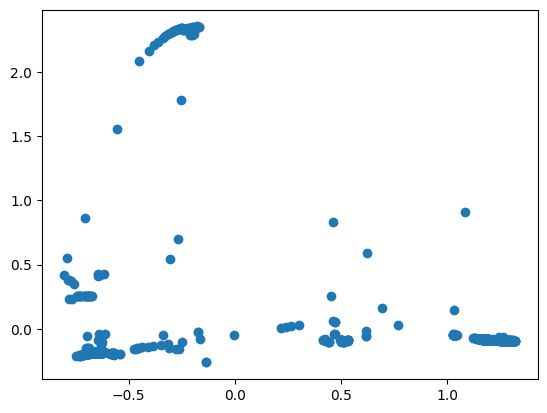

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# create a list of 10 data points with 41 features each
# data = np.random.rand(10, 41)

# reduce the dimensionality of the data to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(R2l_data)

# create a scatter plot of the reduced data
fig, ax = plt.subplots()
ax.scatter(reduced_data[:,0], reduced_data[:,1])
plt.show()


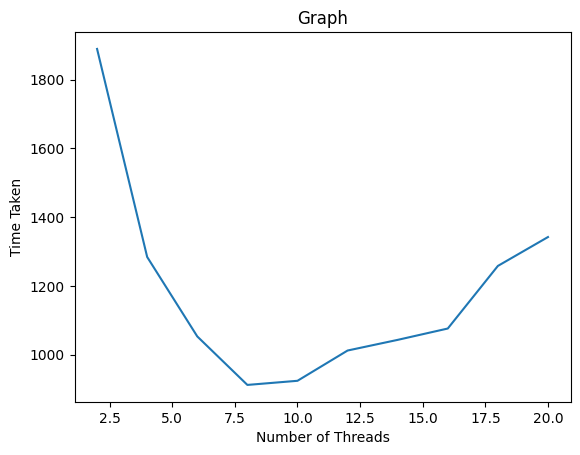

In [21]:
#two arrays are there plot graph of them also label the axis
import matplotlib.pyplot as plt
#x-axis
x=[2,4,6,8,10,12,14,16,18,20]
#y-axis
y=[1889,1284,1053,912,924,1012,1043,1076,1258,1342]
#plotting the points
plt.plot(x,y)
#naming the x-axis
plt.xlabel('Number of Threads')
#naming the y-axis
plt.ylabel('Time Taken')
#plot title
plt.title('Graph')
#function to show the plot
plt.show()

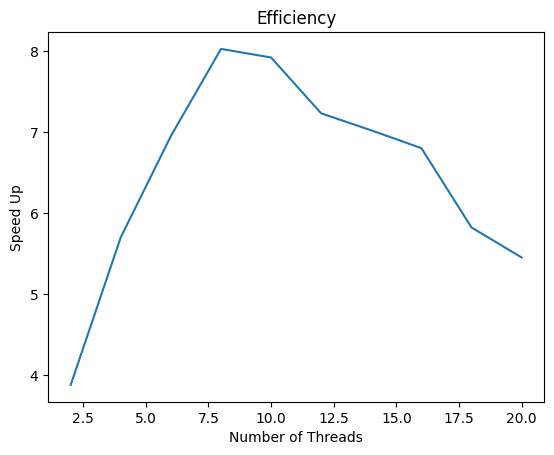

In [22]:
#two arrays are there plot graph of them also label the axis
import matplotlib.pyplot as plt
#x-axis
x=[2,4,6,8,10,12,14,16,18,20]
#y-axis
y=[3.875,5.7,6.95,8.026,7.92,7.23,7.02,6.8,5.82,5.45]
#plotting the points
plt.plot(x,y)
#naming the x-axis
plt.xlabel('Number of Threads')
#naming the y-axis
plt.ylabel('Speed Up')
#plot title
plt.title('Efficiency')
#function to show the plot
plt.show()